<a href="https://colab.research.google.com/github/deepakgowtham/EVA4/blob/master/Week9/Quiz/Quiz_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-17 18:08:48.046802


In [0]:
!cp -rp '/content/drive/My Drive/py_files/models' .
!cp -rp '/content/drive/My Drive/py_files/utils' .

In [0]:
from utils.download_load import download_load
from utils.display_imgs import display_imgs
from utils.train_test import train , test
from utils.disp_summary import disp_summary
from models.quiz_dnn import Net

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import torchvision
import torchsummary
from torchsummary import summary
import torch

In [3]:
trainset, testset, train_loader, test_loader, classes =download_load()

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


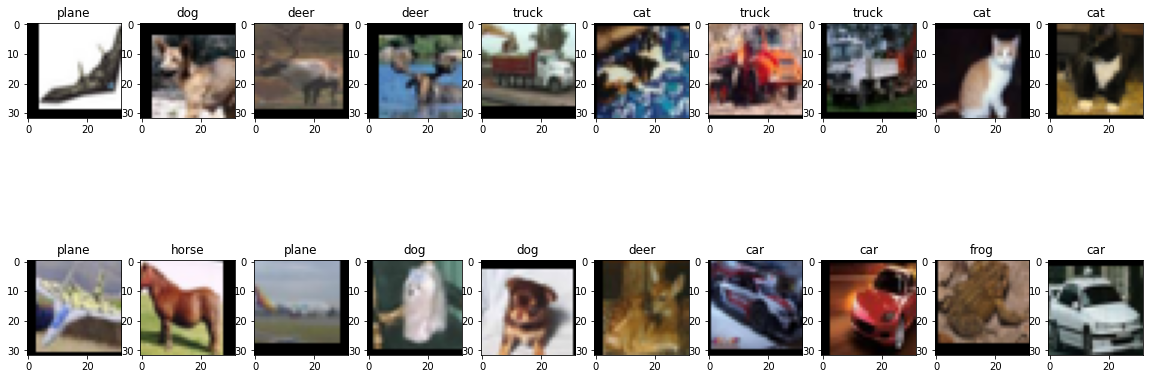

In [4]:
display_imgs(train_loader, classes)

In [0]:
def disp_summary(model):
	#use_cuda= torch.cuda.is_available()
	#device=torch.device('cuda' if use_cuda else 'cpu')
	##model=Net().to(device)
	summary(model, input_size=(3,32,32))

In [0]:
use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')
model=Net().to(device)

In [6]:
disp_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]              96
            Conv2d-6           [-1, 32, 32, 32]           9,216
       BatchNorm2d-7           [-1, 32, 32, 32]              64
              ReLU-8           [-1, 32, 32, 32]               0
         Dropout2d-9           [-1, 32, 32, 32]               0
        MaxPool2d-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          18,432
      BatchNorm2d-12           [-1, 64, 16, 16]             128
             ReLU-13           [-1, 64, 16, 16]               0
        Dropout2d-14           [-1, 64,

/content/models/quiz_dnn.py:88: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x13)


In [7]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
#model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = OneCycleLR(optimizer,max_lr=0.5,total_steps=20)

for epoch in range(1, 21):
    print(f'Epoch: {epoch} Learning_Rate {scheduler.get_lr()}')
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 1 Learning_Rate [0.020000000000000018]


/content/models/quiz_dnn.py:88: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x13)
Loss=1.4814897775650024 Batch_id=781 Accuracy=33.71: 100%|██████████| 782/782 [00:20<00:00, 39.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.4113, Accuracy: 4819/10000 (48.19%)

Epoch: 2 Learning_Rate [0.06583592135001265]


Loss=1.5359840393066406 Batch_id=781 Accuracy=46.79: 100%|██████████| 782/782 [00:19<00:00, 39.39it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1821, Accuracy: 5675/10000 (56.75%)

Epoch: 3 Learning_Rate [0.18583592135001265]


Loss=1.0099661350250244 Batch_id=781 Accuracy=53.53: 100%|██████████| 782/782 [00:19<00:00, 39.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1022, Accuracy: 5945/10000 (59.45%)

Epoch: 4 Learning_Rate [0.3341640786499874]


Loss=0.9682512879371643 Batch_id=781 Accuracy=58.82: 100%|██████████| 782/782 [00:19<00:00, 39.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9852, Accuracy: 6525/10000 (65.25%)

Epoch: 5 Learning_Rate [0.45416407864998737]


Loss=0.8721078634262085 Batch_id=781 Accuracy=62.74: 100%|██████████| 782/782 [00:20<00:00, 38.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9433, Accuracy: 6726/10000 (67.26%)

Epoch: 6 Learning_Rate [0.5]


Loss=1.146743655204773 Batch_id=781 Accuracy=65.93: 100%|██████████| 782/782 [00:19<00:00, 39.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7757, Accuracy: 7314/10000 (73.14%)

Epoch: 7 Learning_Rate [0.49373200311754367]


Loss=0.7267275452613831 Batch_id=781 Accuracy=68.32: 100%|██████████| 782/782 [00:19<00:00, 39.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8664, Accuracy: 7079/10000 (70.79%)

Epoch: 8 Learning_Rate [0.47524231600673683]


Loss=0.9468026161193848 Batch_id=781 Accuracy=70.71: 100%|██████████| 782/782 [00:19<00:00, 39.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7507, Accuracy: 7373/10000 (73.73%)

Epoch: 9 Learning_Rate [0.445458088785525]


Loss=0.7584526538848877 Batch_id=781 Accuracy=71.95: 100%|██████████| 782/782 [00:19<00:00, 40.03it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6451, Accuracy: 7788/10000 (77.88%)

Epoch: 10 Learning_Rate [0.40587282697488153]


Loss=0.7835683226585388 Batch_id=781 Accuracy=73.44: 100%|██████████| 782/782 [00:20<00:00, 39.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6645, Accuracy: 7756/10000 (77.56%)

Epoch: 11 Learning_Rate [0.3584715008956504]


Loss=0.6301167607307434 Batch_id=781 Accuracy=74.95: 100%|██████████| 782/782 [00:19<00:00, 39.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6009, Accuracy: 7923/10000 (79.23%)

Epoch: 12 Learning_Rate [0.30563101096814466]


Loss=0.5914806723594666 Batch_id=781 Accuracy=75.52: 100%|██████████| 782/782 [00:19<00:00, 39.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5877, Accuracy: 7968/10000 (79.68%)

Epoch: 13 Learning_Rate [0.250001]


Loss=0.4508838653564453 Batch_id=781 Accuracy=76.46: 100%|██████████| 782/782 [00:19<00:00, 39.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5424, Accuracy: 8132/10000 (81.32%)

Epoch: 14 Learning_Rate [0.19437098903185537]


Loss=0.6154962778091431 Batch_id=781 Accuracy=77.85: 100%|██████████| 782/782 [00:20<00:00, 38.95it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5184, Accuracy: 8201/10000 (82.01%)

Epoch: 15 Learning_Rate [0.14153049910434962]


Loss=0.2427743673324585 Batch_id=781 Accuracy=78.62: 100%|██████████| 782/782 [00:19<00:00, 39.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4964, Accuracy: 8319/10000 (83.19%)

Epoch: 16 Learning_Rate [0.09412917302511849]


Loss=0.4792832136154175 Batch_id=781 Accuracy=79.82: 100%|██████████| 782/782 [00:19<00:00, 39.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4797, Accuracy: 8356/10000 (83.56%)

Epoch: 17 Learning_Rate [0.05454391121447502]


Loss=0.868950366973877 Batch_id=781 Accuracy=80.77: 100%|██████████| 782/782 [00:19<00:00, 39.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4663, Accuracy: 8417/10000 (84.17%)

Epoch: 18 Learning_Rate [0.024759683993263143]


Loss=0.5061818957328796 Batch_id=781 Accuracy=81.71: 100%|██████████| 782/782 [00:19<00:00, 39.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4422, Accuracy: 8504/10000 (85.04%)

Epoch: 19 Learning_Rate [0.006269996882456277]


Loss=0.7181202173233032 Batch_id=781 Accuracy=82.16: 100%|██████████| 782/782 [00:20<00:00, 38.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4331, Accuracy: 8534/10000 (85.34%)

Epoch: 20 Learning_Rate [2e-06]


Loss=0.6104347705841064 Batch_id=781 Accuracy=82.27: 100%|██████████| 782/782 [00:19<00:00, 39.47it/s]



Test set: Average loss: 0.4328, Accuracy: 8525/10000 (85.25%)

